# Neural Networks

~~~bash

> pip install tensorflow
> pip install keras
~~~


- Datasets: https://keras.io/api/datasets/
  - MNIST: 60k images for hand-written digits (28x28 pixels) , 10k test images

[Towards the Data Science > Hyperparameter Tuning in NN](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594 "VideoTutorial")

[Towards the Data Science > Exploring Activation Functions for NN](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b "VideoTutorial")

In [1]:
from keras import models
from keras import layers
from keras.datasets import mnist

# from keras.utils import to_categorical  ---> Sometime makes ERRORS
from tensorflow.keras.utils import to_categorical  # one hot encoding
from tensorflow.keras.models import load_model     # loading the model
from tensorflow.keras.models import model_from_json # loading the model architecture

import matplotlib.pyplot as plt
import numpy as np

# for confusion matrix (old way)
import itertools
from sklearn.metrics import confusion_matrix

# for confusin matrix (new way)
from sklearn.metrics import plot_confusion_matrix


# Loading dataset

In [2]:
(train_images, train_labels), (test_images, test_labels)   =  mnist.load_data()

# Exploring data

In [3]:
# Train Data
print(train_images.ndim) # 3x dimension
print(train_images.shape) # tuple (60000, 28,28)
print(train_labels.ndim) # 1
print(train_labels.shape) # (60000,)
print()



# Test Data
print(test_images.ndim) # 3x domentsion
print(test_images.shape) # tuple (10000, 28,28)
print(test_labels.ndim) # 1
print(test_labels.shape) # (10000,)
print()



3
(60000, 28, 28)
1
(60000,)

3
(10000, 28, 28)
1
(10000,)



# Visualize some data

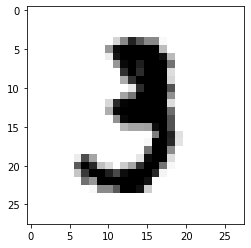

Label:  3


In [4]:
import matplotlib.pyplot as plt 

IMAGE_INDEX = 10

digit = train_images[IMAGE_INDEX]  
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

print("Label: ",train_labels[IMAGE_INDEX])

# Prepare the Training data

## 1. Reshape the images from 28x28 to 784x1

In [5]:
# Train Images
train_images = train_images.reshape( (60000, 784) )  # 784 = 28x28
print(train_images.shape) # (60000,784)
print(train_images.ndim) # 2


# Test Images
test_images = test_images.reshape((10000, 784))
print(test_images.shape)
print(test_images.ndim)

(60000, 784)
2
(10000, 784)
2


## 2. Scaling the input values from 0-255 ---> 0-1

In [6]:
train_images = train_images.astype('float32') / 255 
test_images = test_images.astype('float32') / 255 


## 3. Prepare the Labels : 0, 1, 2, 3,.., 9 ---> One Hot Encoding
Input: [0, 1, ,2 ,3]

Output:

- [1,0,0,0] --> 0
- [0,1,0,0] --> 1
- [0,0,1,0] --> 2
- [0,0,0,1] --> 3

In [7]:
# Only for the train labels ---> without doing it for test labels
train_labels = to_categorical(train_labels)


# Building the Network

In [8]:
network = models.Sequential()  # linear stack of layers

# Add Dense (fully connected) Layer to the network

# Define the first layer, we define two things: 
# 1. Input Layer  
# 2. Hidder Layer
network.add(layers.Dense(512, activation="sigmoid", input_shape = (784,)))   

# Output Layer
network.add(layers.Dense(10, activation="sigmoid"))


# Get Network Summary

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Compile / Configure the network

- Optimizer: Mechasim to update the weights and biases
- Loss: How bad is my model > MSE, MAE, ...
- Metrics: Performance of  my model > accuracy
  

In [ ]:
network.compile(loss='categorical_crossentropy', optimizer='rmsprop' , metrics=['accuracy'])


# Fit the network

In [ ]:
#network.fit(train_images, train_labels, epochs= 5, shuffle=True)

# verbose: which information will be shown during fitting , auto, 0, 1, ,2
#network.fit(train_images, train_labels, epochs= 2, shuffle=True, verbose=2) 

network.fit(train_images, train_labels, epochs= 2, shuffle=True, verbose=2, validation_split= 0.1) # 10% will be for validation data 


Epoch 1/2
1688/1688 - 17s - loss: 0.3473 - accuracy: 0.9010 - val_loss: 0.1808 - val_accuracy: 0.9505 - 17s/epoch - 10ms/step
Epoch 2/2
1688/1688 - 16s - loss: 0.1872 - accuracy: 0.9446 - val_loss: 0.1261 - val_accuracy: 0.9640 - 16s/epoch - 10ms/step


## Save the training history to a variable for plotting later


In [ ]:
history = network.fit(train_images, train_labels, epochs= 2, shuffle=True, verbose=2, validation_split= 0.1)

Epoch 1/2
1688/1688 - 21s - loss: 0.1274 - accuracy: 0.9622 - val_loss: 0.1036 - val_accuracy: 0.9692 - 21s/epoch - 12ms/step
Epoch 2/2
1688/1688 - 21s - loss: 0.0965 - accuracy: 0.9714 - val_loss: 0.0914 - val_accuracy: 0.9720 - 21s/epoch - 12ms/step


# Plot the accuracy

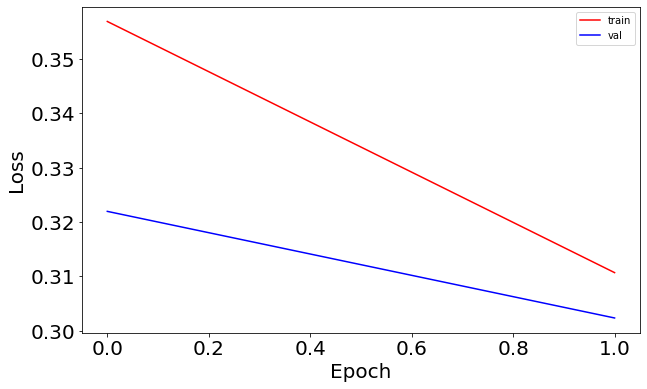

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy

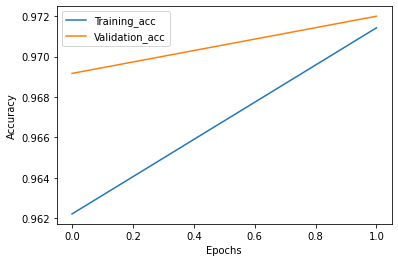

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Validation_acc"])
plt.show()

# Prediction (using Test data)

In [ ]:
prediction = network.predict(x = test_images)

In [ ]:
for i in prediction:  
    print(i)   # --> data between 0 and 1


[8.0520692e-09 1.6513745e-11 4.2769889e-07 4.9410173e-06 2.8113447e-11
 1.4604539e-07 5.6394064e-14 2.4865371e-01 8.9512113e-09 5.9539678e-07]
[1.0629291e-06 2.1998341e-05 6.2494481e-01 7.8242429e-06 5.3469691e-13
 2.2473619e-06 1.2677776e-06 9.5624138e-13 5.0367044e-07 1.9599956e-13]
[2.4021345e-12 4.5382977e-04 2.1658690e-07 9.5809822e-09 9.5563757e-10
 1.3524062e-08 4.7558211e-09 1.1772515e-07 7.1503884e-08 1.0200143e-09]
[5.9155637e-01 7.4385959e-10 2.2844330e-05 1.8538163e-06 1.5114501e-06
 7.9757319e-06 3.1351909e-05 3.0042827e-05 3.8550578e-08 5.6669549e-05]
[2.3054620e-08 1.4091204e-12 3.1935926e-07 1.2492758e-09 7.6493621e-03
 5.2799233e-08 8.1153509e-08 2.0194773e-06 5.2424330e-08 8.9188070e-05]
[1.55988573e-11 3.79085541e-03 1.05243615e-07 1.94157526e-08
 5.18814813e-09 3.82712084e-09 9.64997304e-10 7.74403270e-06
 1.30855696e-07 3.55262451e-08]
[1.24167265e-11 1.05506950e-10 2.54716648e-09 1.10474536e-08
 3.79035175e-02 2.77751792e-06 5.60880542e-09 3.43613760e-06
 6.428158

In [ ]:
# [0 0.01 0.8  0 0 0 0 0 0 0] -> Maximum: 0.8 --> means digit 2 (label = 2)

rounded_prediction = np.argmax(prediction, axis = 1) # axis = 1 (though rows) 

for i in rounded_prediction:
    print(i)

7
2
1
0
4
1
4
9
6
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
2
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
0
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
5
6
1
3
8
1
0
5
1
3
1
5
0
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
9
9
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
2
9
4
0
6


In [ ]:
# Compare between Truth Table (Test Data) with Predicted Data

IMAGES_INDEX = 29

print(test_labels[IMAGES_INDEX])        # Truth value of the digit (Label)
print(rounded_prediction[IMAGES_INDEX]) # Predicted digit 


1
1


# Confusion Matrix 

- Old Way but still in productive systems via Scikit
- New Way via Scikit
- Modern Way

In [ ]:
# 1. Variante
# Code is copied from scikit website 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 973    0    1    1    0    2    1    1    1    0]
 [   0 1118    5    0    0    1    4    1    6    0]
 [   6    0 1009    1    2    1    2    6    5    0]
 [   0    0   17  951    1   18    0   10    6    7]
 [   1    0    6    0  943    0    3    1    2   26]
 [   7    0    0    4    2  860    9    2    4    4]
 [   9    3    1    0    4    5  932    0    4    0]
 [   2    2   16    1    0    0    0  991    0   16]
 [   7    0    8    3    4    6    3    5  931    7]
 [   3    4    0    5    8    7    0    4    1  977]]


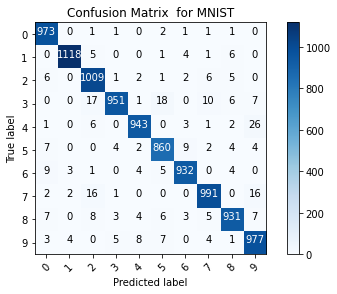

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_prediction)

# create a lables for my plot --> classes
cm_plot_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

plot_confusion_matrix(cm= cm, classes = cm_plot_labels, title = "Confusion Matrix  for MNIST")


In [ ]:
# 2. Variant via Scikit (New way)  : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html


In [ ]:
# 3. Seaborn (Modern Way)

# Save the Model

1. save the whole model(network) : architecture, weights and biases, configuration

In [ ]:
network.save("./models/mnist_1.h5")

2. save only the weights

In [ ]:
network.save_weights("./models/minst_1_weights.h5")

3. save only the architecture


In [ ]:
# Save the architecture to json string
json_string = network.to_json()

# Save the architecture to YAML string  --> Removed due to security risks
#yaml_string = network.to_yaml()

print(json_string)


{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 512, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": nul

# Load the Model

In [ ]:
# Loading the whole Model:

new_model = load_model("./models/mnist_1.h5")

# Gets the summary of the loaded mode
new_model.summary()

# Gets the optimizer name
print("My Optimizer is: " , new_model.optimizer)


# Get the weights
new_model.get_weights()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
My Optimizer is:  <keras.optimizer_v2.rmsprop.RMSprop object at 0x000002173BE4E280>


[array([[-0.02872013,  0.06564866, -0.03618548, ...,  0.02303435,
          0.05721971, -0.00989396],
        [ 0.009283  ,  0.05015784,  0.02520254, ..., -0.01722106,
          0.03855076,  0.05509111],
        [ 0.03372304,  0.06660797,  0.00806589, ...,  0.02891168,
         -0.04544107,  0.003952  ],
        ...,
        [-0.00882876,  0.00331628,  0.0615989 , ..., -0.049711  ,
         -0.06740554, -0.0635472 ],
        [-0.01367919,  0.0632553 , -0.05606363, ...,  0.03321438,
          0.03207067, -0.04730982],
        [-0.05213596,  0.05285263,  0.0060708 , ...,  0.05126904,
          0.01416472, -0.06188749]], dtype=float32),
 array([ 5.68754822e-02, -1.53383717e-01,  5.36055490e-02, -1.05090193e-01,
        -7.27198496e-02,  1.07161038e-01, -2.79115569e-02, -1.48915261e-01,
         6.55401871e-02, -5.10053188e-02,  2.23130882e-02, -1.82833388e-01,
         8.88290107e-02,  6.63990378e-02,  1.81832723e-02, -1.80251360e-01,
         1.40013024e-02, -1.06354319e-02, -6.57805949e

In [ ]:
# Load the weight

# Create a new model
model_2 = models.Sequential(
    [
        layers.Dense(512, activation="sigmoid", input_shape=(784,)),
        layers.Dense(10, activation="sigmoid")
    ]
)

# Model2 Compile (Config)


# Load Weights
model_2.load_weights("./models/minst_1_weights.h5")

In [ ]:
# Loading the architecture

model_architecture = model_from_json(json_string)

model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
